In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

from train import game, run_n_games
from tic_tac_toe_environment import TicTacToeEnvironment
from agent import Agent

Agents learning to play against each other

In [2]:
eps = .1
agent_x = Agent('x', learning_rate=1., eps=eps)
agent_o = Agent('o', learning_rate=1., eps=eps)

num_epoch = 10
n_games = 1_000
n_validation_games = 100  # validate on `n_validation_games` each epoch
plot_iter = 10  # plot every `plot_iter` games

x_win_rate = []
o_win_rate = []

for epoch in range(num_epoch):
    # Train x
    for i in trange(n_games):
        res, _ = game(TicTacToeEnvironment(agent_o), agent_x, train=True)
    
    # Validation against random agent
    agent_x.eps = 0  # inference mode haha
    stats = {
        'x': 0,
        'o': 0,
        'tie': 0,
    }
    for i in range(n_validation_games):
        res, _ = game(TicTacToeEnvironment(Agent('o')), agent_x, train=False)
        stats[res] += 1
    x_win_rate.append(stats['x'] / n_validation_games)
    agent_x.eps = eps  # training mode

    # Train o
    for i in trange(n_games):
        res, _ = game(TicTacToeEnvironment(agent_x), agent_o, train=True)

    # Validation against random agent
    agent_o.eps = 0  # inference
    stats = {
        'x': 0,
        'o': 0,
        'tie': 0,
    }
    for i in range(n_validation_games):
        res, _ = game(TicTacToeEnvironment(Agent('x')), agent_o, train=False)
        stats[res] += 1
    o_win_rate.append(stats['o'] / n_validation_games)
    agent_o.eps = eps

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 704.23it/s]


In [5]:
with open('trained_x.pkl', 'wb') as f:
    pickle.dump(agent_x, f)
with open('trained_o.pkl', 'wb') as f:
    pickle.dump(agent_o, f)

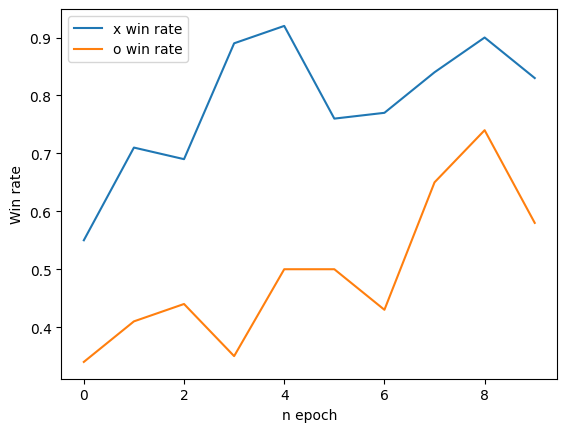

In [6]:
plt.plot(x_win_rate, label='x win rate')
plt.plot(o_win_rate, label='o win rate')
plt.legend()
plt.xlabel('n epoch')
plt.ylabel('Win rate');

In [ ]:
TicTacToeEnvironment(Agent('x'))

In [111]:
xcount = 0
ocount = 0
ties_count = 0
n_eps = 1_000
q_n = []
for i in trange(n_eps):
    # res, _ = game(TicTacToeEnvironment(Agent('o')), agent_x, train=True)
    # res, _ = game(env_x, agent_o, train=False)
    res, _ = game(TicTacToeEnvironment(Agent('x')), Agent('o'), train=False)
    # if i % 1000 == 0:
        # q_n.append(count_non_zero_q(agent.qtable))
    match res:
        case 'x':
            xcount += 1
        case 'o':
            ocount += 1
        case 'tie':
            ties_count += 1

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 754.11it/s]


In [112]:
xcount, ocount, ties_count

(551, 327, 122)

In [3]:
def count_non_zero_q(qtable):
    res = 0
    for v in qtable.values():
        for q in v.values():
            res += 1 if q != 0 else 0
    return res

In [150]:
agent_x.qtable[agent_x.hashable_state(np.array([
    ['o', '', 'x'],
    ['o', '', 'o'],
    ['x', '', 'x'],
]))]

{(0, 1): -10.0, (1, 1): 10.0, (2, 1): 10.0}

In [151]:
agent_x.sample_action(np.array([
    ['o', '', 'x'],
    ['o', '', 'o'],
    ['x', '', 'x'],
]))

(1, 1)

In [147]:
agent_o.qtable[agent_o.hashable_state(np.array([
    ['o', '', 'x'],
    ['', '', 'o'],
    ['x', '', 'x'],
]))]

{(0, 1): -10.0, (1, 0): -10.0, (1, 1): -10.0, (2, 1): -10.0}

In [148]:
agent_o.sample_action(np.array([
    ['o', '', 'x'],
    ['', '', 'o'],
    ['x', '', 'x'],
]))

(1, 0)

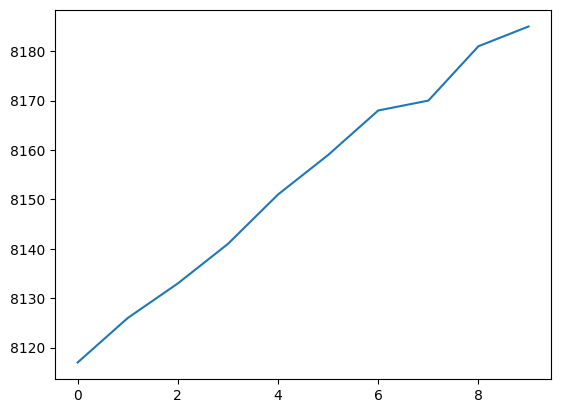

In [34]:
plt.plot(q_n)

100%|██████████| 100000/100000 [01:43<00:00, 962.13it/s]


{'x': 88662, 'o': 6256, 'tie': 5082}

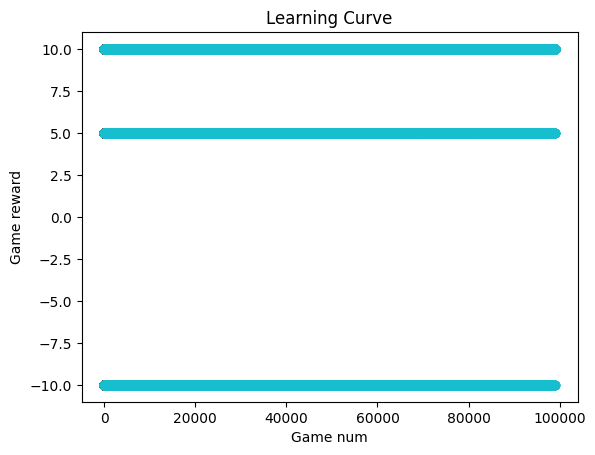

In [13]:
env, agent, stats, rewards = run_n_games(100_000, 'x', train=True)
stats

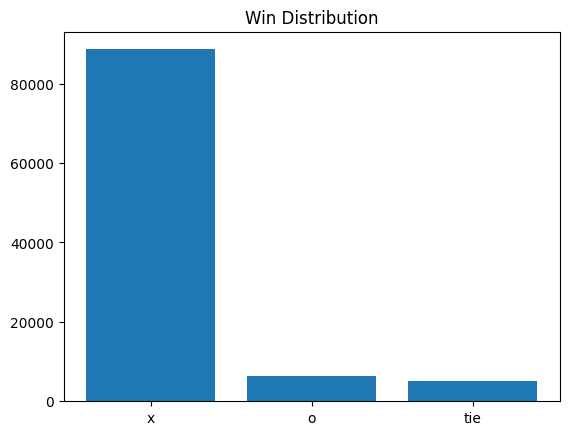

In [27]:
plt.bar(stats.keys(), stats.values())
plt.title('Win Distribution');

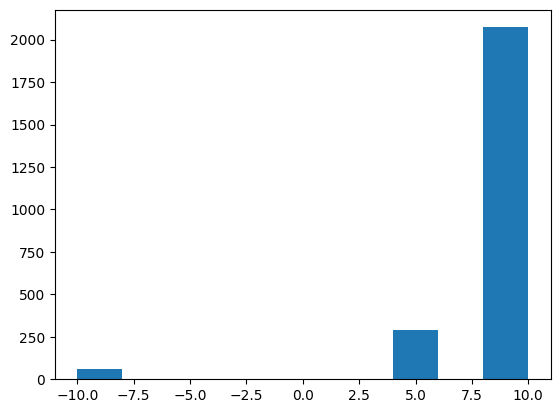

In [28]:
plt.hist([max(v.values()) for v in agent.qtable.values()]);

In [29]:
len(agent.qtable), np.mean([len(item) for item in agent.qtable.values()])

(2423, 3.5621130829550145)